In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

highGrowthStockDf = pd.read_csv('highGrowthStockExample.csv')

print(highGrowthStockDf['TickerSymbol'])

stock_name = highGrowthStockDf.loc[0,'TickerSymbol']
# print(stock_name)

# Download data from Yahoo Finance API
stock = pdr.get_data_yahoo(stock_name,'2019-05-31')

# Dropping Unused Columns
stock.drop('Adj Close', axis=1, inplace=True)
stock.drop('High', axis=1, inplace=True)
stock.drop('Low', axis=1, inplace=True)
stock.drop('Open', axis=1, inplace=True)
stock.drop('Volume', axis=1, inplace=True)
print(stock.head())

# Get the Moving Averages for 3-day, 9-day and 21-day
stock['3-day'] = stock['Close'].rolling(3).mean()
stock['9-day'] = stock['Close'].rolling(9).mean()
stock['21-day'] = stock['Close'].rolling(21).mean()

# Get the daily changes
stock['Change'] = np.log(stock.Close / stock.Close.shift())

0    TDOC
1    SNAP
2     LOB
3    APPN
4    KNSL
5      WD
6    BOMN
Name: TickerSymbol, dtype: object
                Close
Date                 
2019-05-30  58.099998
2019-05-31  58.119999
2019-06-03  53.980000
2019-06-04  55.750000
2019-06-05  55.139999


In [3]:
# 3-day vs 9-day MA.
# Register 1 when 3-day MA is greater than 9-day MA and -1 when 3-day is less than 9-day
stock['Position_3v9'] = np.where(stock['3-day'] > stock['9-day'], 1, 0)
stock['Position_3v9'] = np.where(stock['3-day'] < stock['9-day'], -1, stock['Position_3v9'])

# 9-day vs 21-day MA.
# Register 1 when 9-day MA is greater than 21-day MA and -1 when 9-day is less than 21-day
stock['Position_9v21'] = np.where(stock['9-day'] > stock['21-day'], 1,0)
stock['Position_9v21'] = np.where(stock['9-day'] < stock['21-day'],-1,stock['Position_9v21'])

# Calculate the volatility of the stock
stock['Volatility_3d'] = stock.Change.rolling(3).std().shift()

stock['System_3v9'] = np.where(stock['Position_3v9'] > 0, stock['Position_3v9'] * stock['Change'], 0)
# stock[['Change', 'System_3v9']].cumsum().plot()

In [4]:
print(stock['System_3v9']['20190531':'20191130'].cumsum().tail())

Date
2019-11-22    0.429131
2019-11-25    0.459114
2019-11-26    0.470248
2019-11-27    0.481725
2019-11-29    0.456490
Name: System_3v9, dtype: float64


<AxesSubplot:xlabel='Date'>

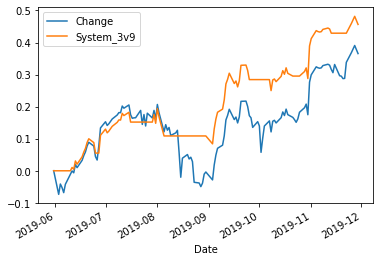

In [7]:
stock[['Change','System_3v9']]['20190531':'20191130'].cumsum().plot()

In [8]:
type(stock['System_3v9']['20190531':'20191130'].cumsum().tail())

pandas.core.series.Series

In [10]:
len(highGrowthStockDf.index)

7